In [1]:
from Homework7 import M33AnalyticOrbit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M33_orbit = M33AnalyticOrbit("M33_predicted_orbit.txt")

In [3]:
M33_orbit.OrbitIntegration(0, 0.1, 10)

In [4]:
M33_pred_orbit = np.genfromtxt("M33_predicted_orbit.txt", comments='#', names=True)

In [5]:
mag_pos = np.sqrt(M33_pred_orbit['x']**2 + M33_pred_orbit['y']**2 + M33_pred_orbit['z']**2)
mag_vel = np.sqrt(M33_pred_orbit['vx']**2 + M33_pred_orbit['vy']**2 + M33_pred_orbit['vz']**2)

In [6]:
M31 = np.genfromtxt("../Homework6/Orbit_M31.txt", comments='#', names=True)
M33 = np.genfromtxt("../Homework6/Orbit_M33.txt", comments='#', names=True)

In [7]:
def rel_pos_vel(gal1, gal2):
    """Calculate the relative position and velocity between two galaxies.

    Parameters
    ----------
    gal1 : numpy.ndarray
        Array containing the position and velocity of the first galaxy.
    gal2 : numpy.ndarray
        Array containing the position and velocity of the second galaxy.

    Returns
    -------
    numpy.ndarray
        Arrays containing the relative position and velocity.
    """
    rel_pos = np.sqrt((gal1['x'] - gal2['x'])**2 + (gal1['y'] - gal2['y'])**2 + (gal1['z'] - gal2['z'])**2)
    rel_vel = np.sqrt((gal1['vx'] - gal2['vx'])**2 + (gal1['vy'] - gal2['vy'])**2 + (gal1['vz'] - gal2['vz'])**2)
    return rel_pos, rel_vel

In [8]:
# Calculate the relative position and velocity between M33 and M31
rel_pos_M33_M31, rel_vel_M33_M31 = rel_pos_vel(M33, M31)

Text(0, 0.5, 'Relative Position (kpc)')

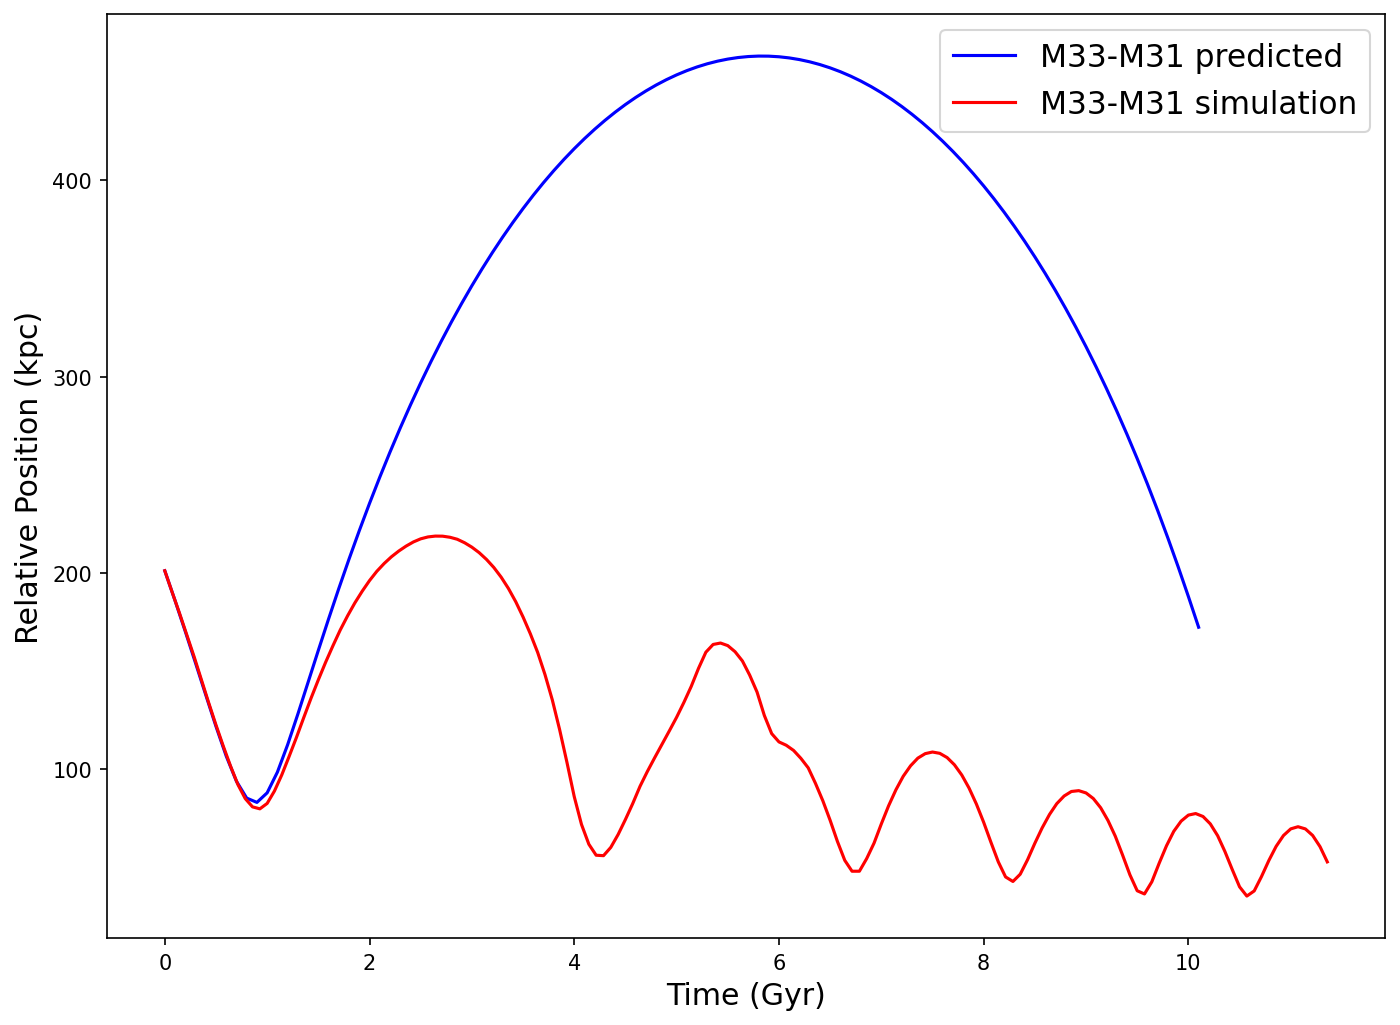

In [9]:
#plotting relative position
fig = plt.figure(figsize=(11,8), dpi=150)
plt.plot(M33_pred_orbit['t'], mag_pos, label ='M33-M31 predicted', color='blue')
plt.plot(M31["t"], rel_pos_M33_M31, label='M33-M31 simulation', color='red')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('Time (Gyr)', fontsize='x-large')
plt.ylabel('Relative Position (kpc)', fontsize='x-large')

Text(0, 0.5, 'Relative Velocity (kpc/s)')

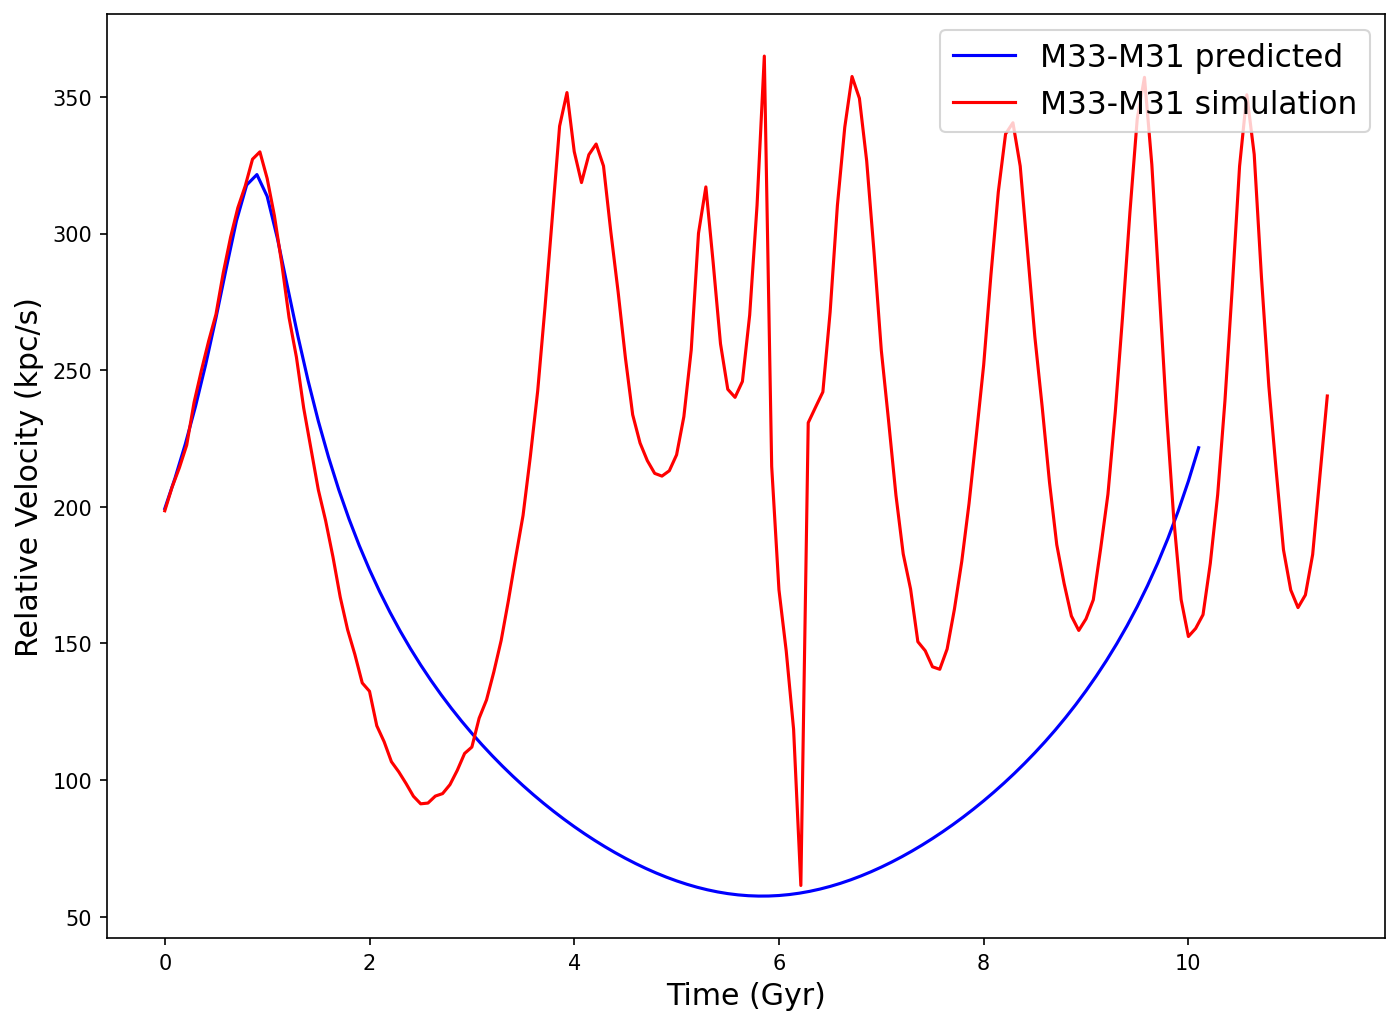

In [10]:
#plotting relative position
fig = plt.figure(figsize=(11,8), dpi=150)
plt.plot(M33_pred_orbit['t'], mag_vel, label ='M33-M31 predicted', color='blue')
plt.plot(M31["t"], rel_vel_M33_M31, label='M33-M31 simulation', color='red')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('Time (Gyr)', fontsize='x-large')
plt.ylabel('Relative Velocity (kpc/s)', fontsize='x-large')

2. The plots match okish until maybe 1.5-1.7 Gyr but after that don't match at all. Both the plots extremely look different.

3. The discrepancy likely arises from inaccurate COM calculations in each iteration. This could be because of the gravitational influence of M31's halo on M33's halo, potentially causing distortions in its shape. Determining the COM becomes increasingly challenging as the system becomes more distorted over time. Including additional physics such as tidal forces and dynamical friction would likely improve the accuracy of the predictions.

4. In order to inlcude MW in the calculations, I would:
- Update the relative positions and velocities of M31 and M33 to include the MW's influence.
- Adjust the gravitational potential to account for the MW's mass and position.
- Recalculate the trajectories of M31 and M33 under the new potential.